In [ ]:
!pip install nltk
# Importamos
import nltk
# Complementos de la librería necesarios para su funcionamiento.
# Todas las opciones aquí https://www.nltk.org/nltk_data/
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.

True

In [ ]:
pip install --upgrade 'joblib<1.4' pycaret

In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Será necesario incorporar características adicionales como el sentimiento o características léxicas.

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificación visto en clase, por lo que es importante que documentéis y expliquéis adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificación final.

**Nota 2**: Cualquier cálculo adicional a los vistos en clase (visualizaciones, nuevas características añadidas al modelo...) será valorado positivamente en la calificación.

## 0. Imports


In [ ]:
import pandas as pd

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(4)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0


In [ ]:
import numpy as np
#ver si existen valores duplicados.
np.sum(dataset.duplicated(subset =["tweet_text"]))

1675

In [ ]:
# luego de hallar 1675 twitts repetidos, procedemos a eliminarlos

dataset.drop_duplicates()

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


In [ ]:
# Buscar valores nulos
np.sum(dataset.isnull())[0]
np.sum(dataset.isnull())[1]

0

## 2. Análisis exploratorio

In [ ]:
longitud_twitt = []
for i in dataset["tweet_text"]:
  longitud_twitt.append(len(i))

In [ ]:
dataset["longitud_twitt"] = longitud_twitt

In [ ]:
dataset["tweet_text"].iloc[74]

'freaky ass ready ass hoes'

In [ ]:
no_bullyn=dataset[dataset["cyberbullying"] == 0]
no_bullyn["longitud_twitt"].max()

1809

In [ ]:
# vemos que la longitud maxima de los twitts es 5000 eliminemos los data set mayores a 400, tambien se puede ver que los twitts que no son bullyn tienen una logitud máxima de 174
dataset =dataset[dataset["longitud_twitt"]< 400]

Text(6.153174382716047, 0.5, 'Caradensidadcteres')

<Figure size 1400x1200 with 0 Axes>

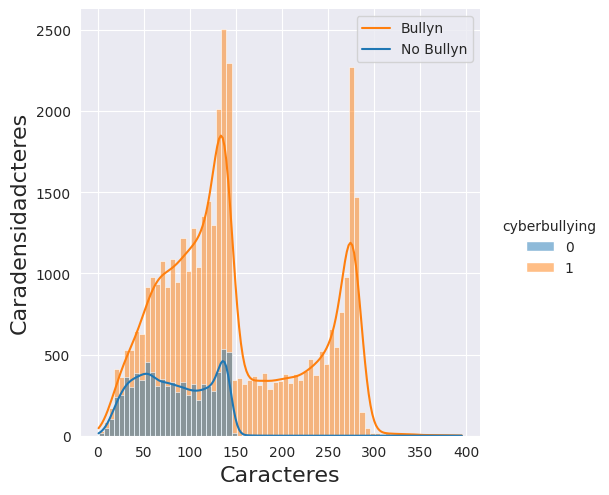

In [ ]:

#dibujamos la distribucion de la longitud de los caractes tanto para los de bulling como lo que no. y vemos que los twitts que que no son categorizados comociber bullyn tienen una longitud menor a los que se concideran Bully

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x = "longitud_twitt", hue = "cyberbullying", kde = True, legend = True)
plt.legend(["Bullyn", "No Bullyn"])

plt.xlabel("Caracteres", fontsize = 16)
plt.ylabel("Caradensidadcteres", fontsize = 16)


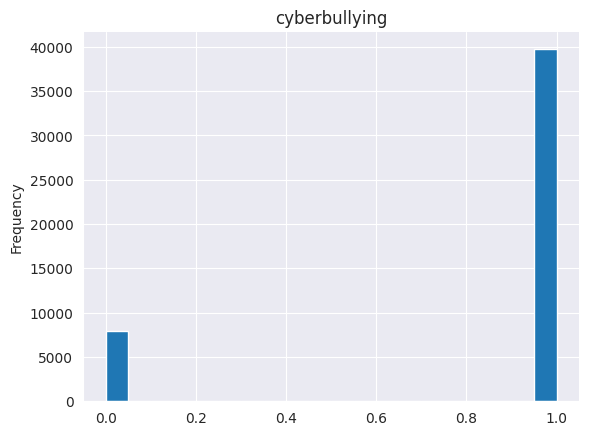

In [ ]:
# @title cyberbullying
#vemos que tenemos datos desbalanceados, en el momento de entrenar lo tendremos en cuenta
from matplotlib import pyplot as plt
dataset['cyberbullying'].plot(kind='hist', bins=20, title='cyberbullying')
plt.gca().spines[['top', 'right',]].set_visible(False)

## 3. Preprocesado y Normalización

In [ ]:
#eliminar espacios y colocar todo el texto en minusculas
def eliminar_espacios(text):
    return  " ".join(text.split())

def texto_to_lower(text):
  return text.lower()


In [ ]:
import sys
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstalling thinc-8.2.3:
      Successfully uninstalled thinc-8.2.3
  Attempting uninstall: spacy
    Found existing installation: spac

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
import re
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()

<ipython-input-19-65f59b620a50>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#Eliminamos espacios y colocamos todos los caracteres en minusculas
dataset["normalizado"] = dataset["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
dataset["normalizado"] = dataset["normalizado"].progress_apply(lambda x: texto_to_lower(x))

  0%|          | 0/47661 [00:00<?, ?it/s]

  0%|          | 0/47661 [00:00<?, ?it/s]

In [ ]:
def replace_contractions(text):
  return contractions.fix(text, slang= True)

In [ ]:
# remplazamos las contracciones
dataset["normalizado"] = dataset["normalizado"].progress_apply(lambda x: replace_contractions(x))

  0%|          | 0/47661 [00:00<?, ?it/s]

In [ ]:
!pip install textacy
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.9 MB/s eta 0:00:00
2024-04-15 21:34:18.449200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 21:34:18.449276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 21:34:18.451478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS 

In [ ]:
dataset.shape

(47661, 4)

In [ ]:
import spacy
from nltk.tokenize import TweetTokenizer, word_tokenize
tweet_tokenizer = TweetTokenizer()

In [ ]:
#vamos a tokenizar nuestro texto
def normalizar_tokenz(documento):
  palabras = tweet_tokenizer.tokenize(documento)

  for i in range(len(palabras)):
    if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
      palabras[i] = "URL"
    elif palabras[i].startswith("@"):
      palabras[i] = "MENTION"
    elif palabras[i].isdigit():
      palabras[i] = "NUM"

  doct_modificado = ' '.join(palabras)


  return doct_modificado




In [ ]:
#activamos la funcion anterior y remplazamos nuestra columna "normalizado"
dataset["normalizado"] = dataset["normalizado"].progress_apply(lambda x:normalizar_tokenz(x))

  0%|          | 0/47661 [00:00<?, ?it/s]

In [ ]:
normalizar_tokenz(dataset.normalizado.iloc[1487])

"rt MENTION : #islamicstate #isis #rotherham the ' prophet ' of #islam on rape URL URL"

In [ ]:
#quitamos otras puntuaciones que no posee la otra libreria

punctuations = string.punctuation

other_stop_words = ['..','...', ':']

In [ ]:
from nltk.corpus import stopwords
import spacy
en_stopwords = stopwords.words("english")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords and other_stop_words and punctuations ]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [ ]:
dataset["preprocessed_text"] = dataset["normalizado"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

  0%|          | 0/47661 [00:00<?, ?it/s]

In [ ]:
dataset["preprocessed_text"]

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2                  MENTION classy whore red velvet cupcake
3        MENTION meh thank head concerned another angry...
4        MENTION isis account pretend kurdish account l...
                               ...                        
47687    black people expect anything depend anything y...
47688    turner withhold disappointment turner call cou...
47689    swear god dumb nigger bitch get bleach hair re...
47690    yea fuck rt MENTION nigger fucking unfollow fu...
47691    bro got chill rt MENTION dog fuck kp dumb nigg...
Name: preprocessed_text, Length: 47661, dtype: object

In [ ]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

In [ ]:
#mencionens url y numeros los comvertimos para mejorar nuestro entrenamiento.
dataset["num_mention"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="NUM"))

  0%|          | 0/47661 [00:00<?, ?it/s]

  0%|          | 0/47661 [00:00<?, ?it/s]

  0%|          | 0/47661 [00:00<?, ?it/s]

## 4. Vectorización

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(dataset["preprocessed_text"])

In [ ]:
vector_data

<47661x407 sparse matrix of type '<class 'numpy.float64'>'
	with 388328 stored elements in Compressed Sparse Row format>

In [ ]:
extra_features = dataset[['num_mention','num_URLS','num_NUM']]

In [ ]:
extra_features

,num_mention,num_URLS,num_NUM
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
47687,0,0,0
47688,0,0,0
47689,0,0,0
47690,1,0,0


## 5. Entrenamiento y evaluación de modelos


In [ ]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["cyberbullying"].values.astype(np.float32)
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()
X_columns

['MENTION',
 'MENTION MENTION',
 'MENTION MENTION MENTION',
 'MENTION URL',
 'MENTION fuck',
 'MENTION fuck obama',
 'MENTION sexist',
 'NUM',
 'NUM year',
 'URL',
 'abuse',
 'act',
 'act like',
 'actually',
 'ago',
 'agree',
 'allow',
 'already',
 'also',
 'always',
 'america',
 'american',
 'andre',
 'another',
 'anti',
 'anyone',
 'anything',
 'around',
 'ask',
 'ass',
 'ass nigger',
 'attack',
 'away',
 'baby',
 'back',
 'bad',
 'beat',
 'become',
 'believe',
 'big',
 'bitch',
 'black',
 'black people',
 'block',
 'book',
 'boy',
 'break',
 'bring',
 'bully',
 'bully girl',
 'bully high',
 'bully high school',
 'bully school',
 'bullying',
 'call',
 'call female',
 'care',
 'change',
 'child',
 'christian',
 'christian woman',
 'christians',
 'claim',
 'class',
 'color',
 'come',
 'comment',
 'community',
 'cool',
 'could',
 'country',
 'create',
 'cry',
 'damn',
 'date',
 'day',
 'death',
 'defend',
 'dick',
 'die',
 'different',
 'disgusting',
 'dog',
 'dude',
 'dumb',
 'dumb ass

In [ ]:
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1997, stratify = y)
print(X_train.shape)
print(X_test.shape)

(35745, 410)
(11916, 410)


In [ ]:
%%time
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(),
                        rfc_params,
                        cv=5,
                        scoring='accuracy').fit(X_train, y_train)

CPU times: user 1h 25min 52s, sys: 6.68 s, total: 1h 25min 59s
Wall time: 1h 26min 36s


In [ ]:
grid_rfc.score(X_test,y_test)

0.8671534071836187

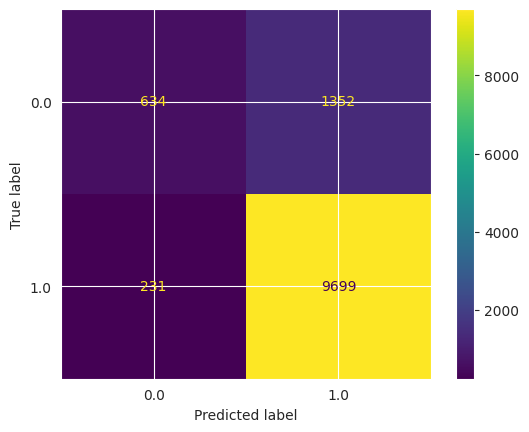

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_rfc, X_test, y_test, normalize = None)

A continuacion son varias comparaciones de modelos con diferentes librerias y su respectivo entrenamiento con el mejor modelo que nos daba el análisis sin embargo en el momento de realizar las predicciones y observarlas en una matriz de confusión vemos que no realiza correctamente las predicciones ya que clasificas todos los texto como "bullyn" (ver la últma matriz de confusión). Esto al parecer se ya que no clasificamos correctamente los emojis y los dejamos como lineas de textos crudas.



In [ ]:
#!pip install pycaret


In [ ]:
import pycaret
from pycaret.classification import *

In [ ]:
model_setup = setup(data=X_train, target= y_train, session_id=1, normalize = False)

,Description,Value
0,Session id,1
1,Target,target
2,Target type,Binary
3,Original data shape,"(35745, 411)"
4,Transformed data shape,"(35745, 411)"
5,Transformed train set shape,"(25021, 411)"
6,Transformed test set shape,"(10724, 411)"
7,Numeric features,410
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8658,0.9087,0.9604,0.8877,0.9226,0.4220,0.4419,9.5720
xgboost,Extreme Gradient Boosting,0.8654,0.9044,0.9639,0.8849,0.9227,0.4098,0.4339,7.4760
gbc,Gradient Boosting Classifier,0.8627,0.8854,0.9787,0.8722,0.9224,0.3456,0.3951,8.6000
ada,Ada Boost Classifier,0.8593,0.8818,0.9778,0.8696,0.9205,0.3254,0.3751,3.1950
lr,Logistic Regression,0.8585,0.8920,0.9695,0.8744,0.9195,0.3486,0.3838,1.9360
ridge,Ridge Classifier,0.8582,0.0000,0.9774,0.8688,0.9199,0.3189,0.3688,1.0890
svm,SVM - Linear Kernel,0.8574,0.0000,0.9832,0.8643,0.9199,0.2912,0.3545,1.0770
rf,Random Forest Classifier,0.8557,0.8881,0.9473,0.8872,0.9162,0.3987,0.4106,15.5790
et,Extra Trees Classifier,0.8541,0.8337,0.9432,0.8886,0.9151,0.4011,0.4105,20.5330
dummy,Dummy Classifier,0.8334,0.5000,1.0000,0.8334,0.9091,0.0000,0.0000,0.9990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

XGB
CV AUC: 0.86438 +/- 0.00293
-------------------------
RF
CV AUC: 0.85011 +/- 0.00523
-------------------------
Tree
CV AUC: 0.82684 +/- 0.00677
-------------------------
Log
CV AUC: 0.85907 +/- 0.00474
-------------------------


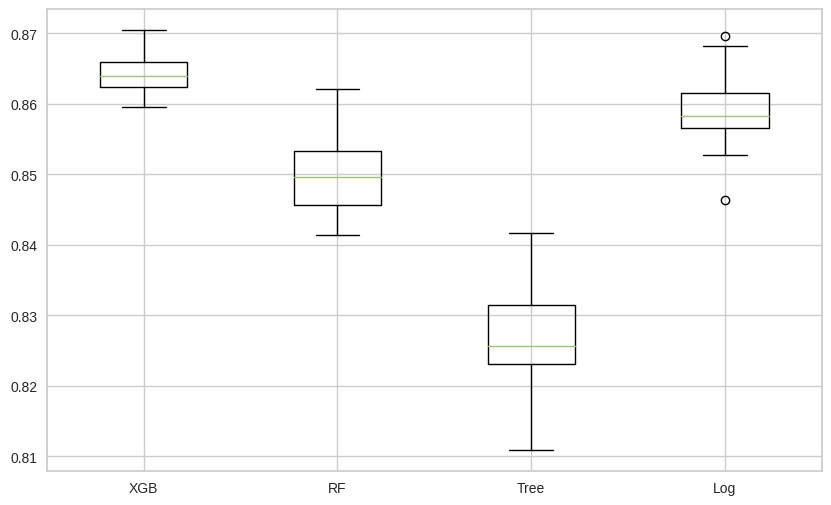

In [ ]:
models_rcv = {
    "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
    "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
    "Tree": DecisionTreeClassifier(random_state=1234),
    "Log": LogisticRegression(solver="newton-cg", penalty="l2"),
}

def rskf_comparison(models, X_train, y_train):

    results = []
    names = []

    for k, v in models.items():

        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
        cv_scores = cross_val_score(v, X_train, y_train, cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')


    return(results, names)


results, names = rskf_comparison(models_rcv, X_train, y_train)
plt.figure(figsize=(10, 6))
comparison = plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names)
plt.show(comparison)

In [ ]:
# entrenamiento de xgboost
rf = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8638,0.8983,0.9583,0.8873,0.9214,0.4158,0.4339
1,0.8721,0.9101,0.9703,0.8869,0.9267,0.4315,0.4603
2,0.8709,0.9053,0.9655,0.8891,0.9257,0.4389,0.4618
3,0.8701,0.9145,0.9727,0.8833,0.9258,0.4137,0.4474
4,0.8597,0.8939,0.9635,0.8796,0.9197,0.3758,0.4018
5,0.8653,0.9083,0.9607,0.8871,0.9224,0.4186,0.4386
6,0.8605,0.9024,0.9564,0.8854,0.9195,0.4021,0.4196
7,0.8585,0.8976,0.9602,0.8808,0.9188,0.3786,0.4011
8,0.8601,0.8968,0.9612,0.8817,0.9197,0.3856,0.4085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
y_predict = rf.predict(X_test)

In [ ]:
y_predict.count()

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize = None)

NameError: name 'rf' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
a, b = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=1234)
clf.fit(X_train, y_train)
print(clf.predict(X_test))

[1. 1. 1. ... 1. 1. 1.]


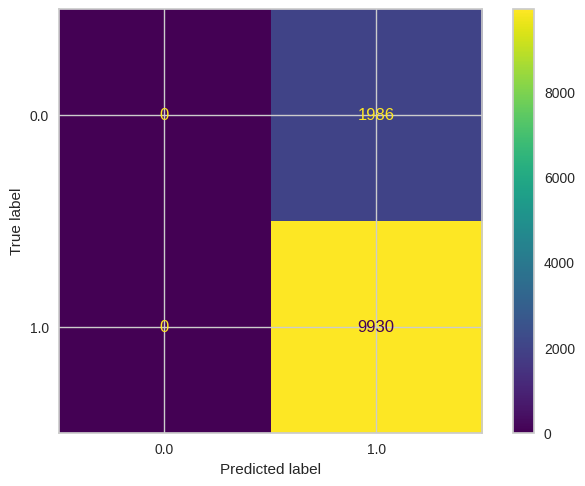

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize = None)